In [1]:
!pip install lightgbm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, log_loss

np.random.seed(24)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
data = pd.read_csv('final_train_data.csv')

In [4]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,3,1,76,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(404290, 632)

In [6]:
#data = data.dropna().reset_index(drop=True)
#data.shape

(0, 632)

In [6]:
data['is_duplicate'].value_counts()/data.shape[0]

,count
is_duplicate,
0,0.630802
1,0.369198


In [7]:
df = data.sample(n=100000).reset_index(drop=True)
df.shape

(100000, 632)

In [8]:
df['is_duplicate'].value_counts()/df.shape[0]

,count
is_duplicate,
0,0.62825
1,0.37175


In [9]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
0,298119,420565,420566,what are some lesser known sights to see when ...,what are some lesser known sights to see when ...,0,1,1,73,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,214548,320170,320171,what are the most cliche crime thriller plots,what are the most common crime fiction cliches,1,1,1,46,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,365589,495707,378435,what do you think of english premier league,what is the english premier league,0,1,1,44,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,139711,222188,222189,which is the best reference or theory book f...,which is the best book for physics theory jee,1,1,1,76,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,296851,345009,28814,what are some tips for cracking the cat,how do you crack the cat,1,1,2,40,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
columns_to_be_dropped = ['id', 'qid1', 'qid2', 'question1', 'question2']
target_column = 'is_duplicate'

In [11]:
X = df.drop(columns=columns_to_be_dropped+[target_column])
y = df[target_column]

In [12]:
X.shape, y.shape

((100000, 626), (100000,))

## Splitting dataset into train and test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (75000, 626), (75000,)
Test Data: (25000, 626), (25000,)


In [15]:
print("="*10, "Distribution of output variable in train data", "="*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ", int(train_distr[0]/train_len), "Class 1: ", int(train_distr[1]/train_len))


print("="*10, "Distribution of output variable in test data", "="*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ", int(test_distr[1]/test_len), "Class 1: ", int(test_distr[1]/test_len))

========== Distribution of output variable in train data ==========
Class 0:  0 Class 1:  0
========== Distribution of output variable in test data ==========
Class 0:  0 Class 1:  0


In [16]:
def plot_confusion_matrix(test_y, predict_y):

    C = confusion_matrix(test_y, predict_y)

    A =(((C.T)/(C.sum(axis=1))).T)

    B = (C/C.sum(axis=0))

    plt.figure(figsize=(20,4))
    labels = [1,2]
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

# Random Model

Log Loss on Test Data using Random Model:  0.8846919019091208


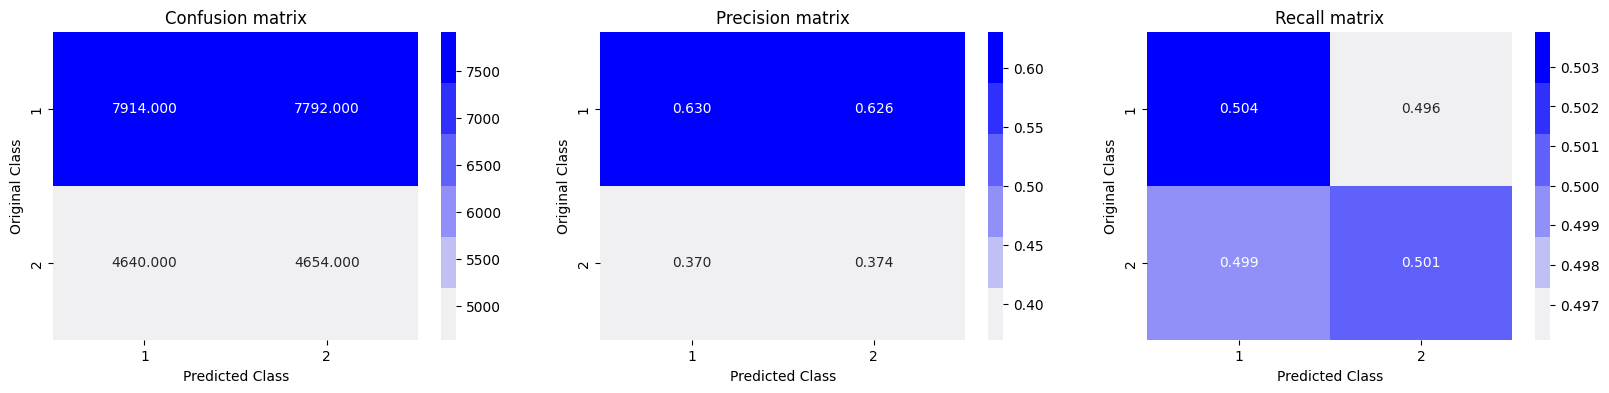

In [18]:
predicted_y = np.zeros((test_len, 2))

for i in range(test_len):
   rand_probs = np.random.rand(1, 2)
   predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])

print("Log Loss on Test Data using Random Model: ", log_loss(y_test, predicted_y))

predicted_y = np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

# Logistic Regression Model

In [28]:
'''standard_scalar = StandardScaler()
scaled_X_train = standard_scalar.fit_transform(X_train)
scaled_X_test = standard_scalar.transform(X_test)'''

'standard_scalar = StandardScaler()\nscaled_X_train = standard_scalar.fit_transform(X_train)\nscaled_X_test = standard_scalar.transform(X_test)'

In [29]:
'''%%time
lr_model = LogisticRegression()
lr_model.fit(scaled_X_train, y_train)'''

'%%time\nlr_model = LogisticRegression()\nlr_model.fit(scaled_X_train, y_train)'

In [30]:
'''print("=="*10, "TRAIN DATA PREDICTIONS", "=="*10)
train_preds = lr_model.predict(scaled_X_train)
train_pred_probs = lr_model.predict_proba(scaled_X_train)
print("Log Loss on Train Data using Logistic Regression Model: ", log_loss(y_train, train_pred_probs))
plot_confusion_matrix(y_train, train_preds)'''

'print("=="*10, "TRAIN DATA PREDICTIONS", "=="*10)\ntrain_preds = lr_model.predict(scaled_X_train)\ntrain_pred_probs = lr_model.predict_proba(scaled_X_train)\nprint("Log Loss on Train Data using Logistic Regression Model: ", log_loss(y_train, train_pred_probs))\nplot_confusion_matrix(y_train, train_preds)'

In [31]:
'''print("=="*10, "TEST DATA PREDICTIONS", "=="*10)
test_preds = lr_model.predict(scaled_X_test)
test_pred_probs = lr_model.predict_proba(scaled_X_test)
print("Log Loss on Test Data using Logistic Regression Model: ", log_loss(y_test, test_pred_probs))
plot_confusion_matrix(y_test, test_preds)'''

'print("=="*10, "TEST DATA PREDICTIONS", "=="*10)\ntest_preds = lr_model.predict(scaled_X_test)\ntest_pred_probs = lr_model.predict_proba(scaled_X_test)\nprint("Log Loss on Test Data using Logistic Regression Model: ", log_loss(y_test, test_pred_probs))\nplot_confusion_matrix(y_test, test_preds)'

# XGBoost Model

In [22]:
xgb_model = XGBClassifier(random_state=24)
xgb_model.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=24, ...)

==================== TRAIN DATA PREDICTIONS ====================
Log Loss on Train Data using XGBoost Model:  0.20753114888543275


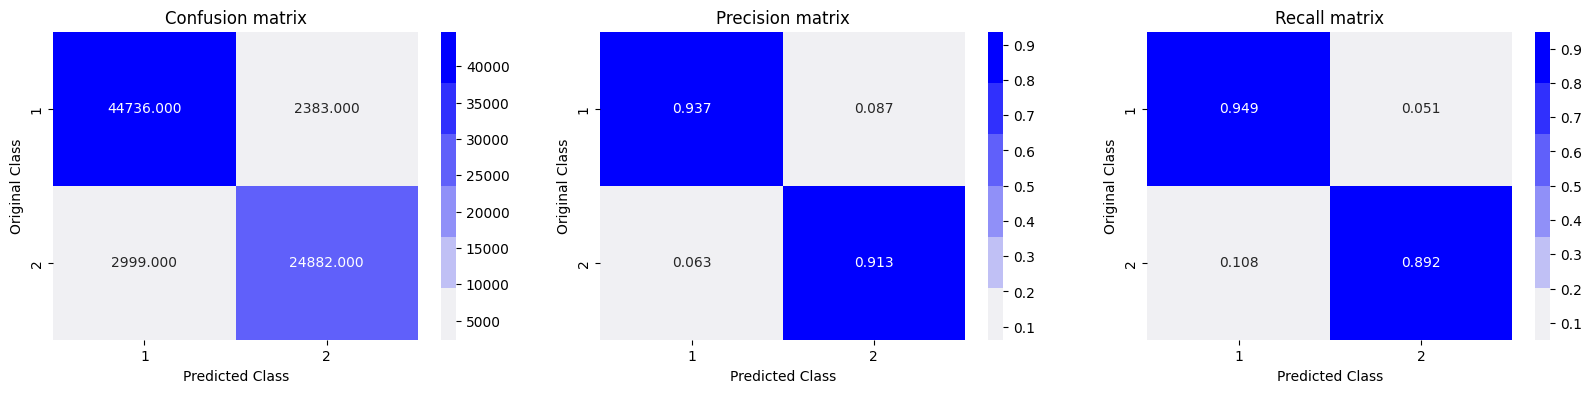

In [23]:
print("=="*10, "TRAIN DATA PREDICTIONS", "=="*10)
train_preds = xgb_model.predict(X_train)
train_pred_probs = xgb_model.predict_proba(X_train)
print("Log Loss on Train Data using XGBoost Model: ", log_loss(y_train, train_pred_probs))
plot_confusion_matrix(y_train, train_preds)

==================== TEST DATA PREDICTIONS ====================
Log Loss on Test Data using XGBoost Model:  0.34406967347821127


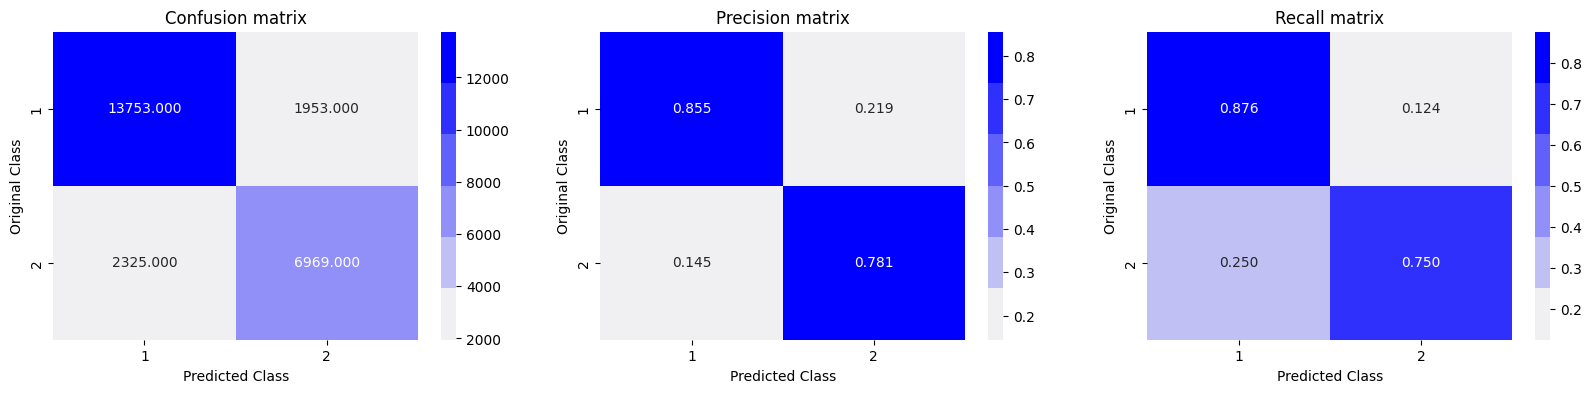

In [24]:
print("=="*10, "TEST DATA PREDICTIONS", "=="*10)
test_preds = xgb_model.predict(X_test)
test_pred_probs = xgb_model.predict_proba(X_test)
print("Log Loss on Test Data using XGBoost Model: ", log_loss(y_test, test_pred_probs))
plot_confusion_matrix(y_test, test_preds)

# Gradient Boosting Model

In [25]:
lgb_model = LGBMClassifier(random_state=24)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 27881, number of negative: 47119
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.232526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52010
[LightGBM] [Info] Number of data points in the train set: 75000, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371747 -> initscore=-0.524731
[LightGBM] [Info] Start training from score -0.524731


LGBMClassifier(random_state=24)

==================== TRAIN DATA PREDICTIONS ====================
Log Loss on Train Data using LGBM Model:  0.30317692979004135


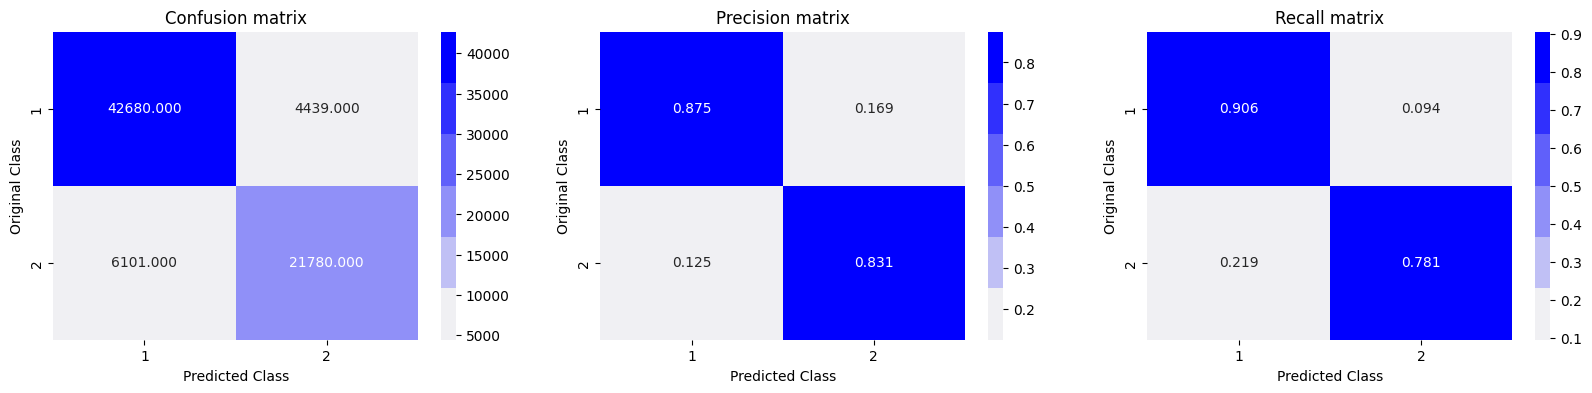

In [26]:
print("=="*10, "TRAIN DATA PREDICTIONS", "=="*10)
train_preds = lgb_model.predict(X_train)
train_pred_probs = lgb_model.predict_proba(X_train)
print("Log Loss on Train Data using LGBM Model: ", log_loss(y_train, train_pred_probs))
plot_confusion_matrix(y_train, train_preds)

==================== TEST DATA PREDICTIONS ====================
Log Loss on Test Data using LGBM Model:  0.338358109688033


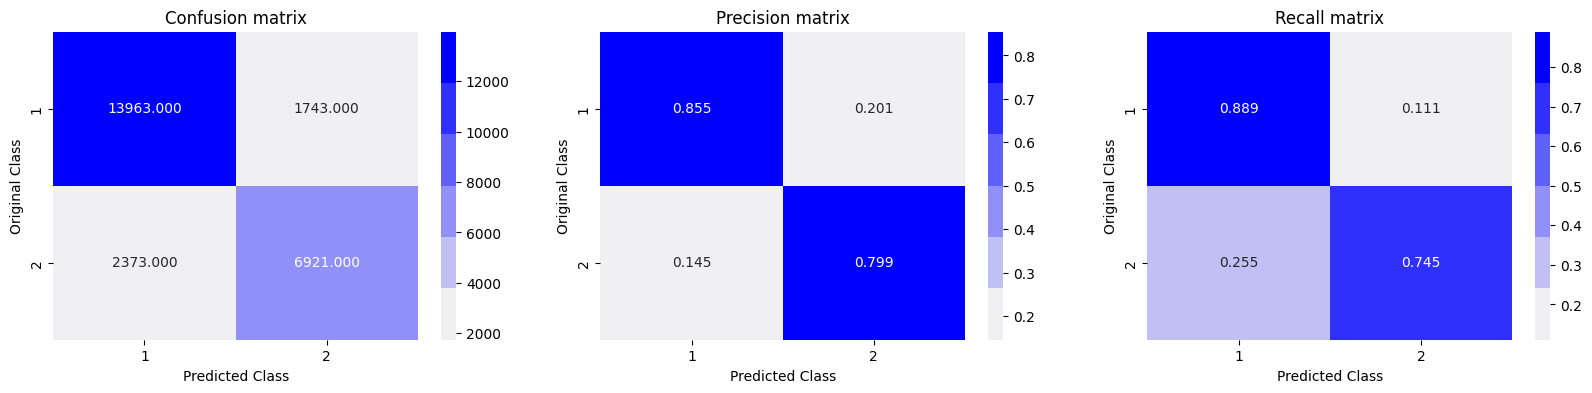

In [27]:
print("=="*10, "TEST DATA PREDICTIONS", "=="*10)
test_preds = lgb_model.predict(X_test)
test_pred_probs = lgb_model.predict_proba(X_test)
print("Log Loss on Test Data using LGBM Model: ", log_loss(y_test, test_pred_probs))
plot_confusion_matrix(y_test, test_preds)